# To DO
Sometimes there is air in root mask so this need to be filled as to not stuff up the proportion touching <br>
"Rhizosheath" mask still has holes, this needs a binary fill slice by slice (or a better implementation of fill holes 3D)<br>


In [ ]:
# the version of  openpnm can glitch this notebook, seems to work with 3.3.0.dev4
# https://porespy.org/modules/generated/generated/porespy.networks.regions_to_network.html this explains the output

In [3]:
import zipfile
from glob import glob
from tifffile import imread
import inspect
import statistics
#from cellpose import models #in case models are nto downloaded yet

# DISPLAY RESULTS imports
#from cellpose import plot
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from scipy.ndimage import zoom
import skimage.io
from PIL import Image
import pandas as pd
#import torch
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
#import torchvision
#import torchvision.transforms as T
import numpy as np
#from torchvision.models.segmentation.fcn import FCNHead
#from torchvision.models.segmentation.deeplabv3 import DeepLabHead
import time
import os
import pandas as pd
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
import argparse
#import torch
#import torchvision
from PIL import Image
#import torch.nn as nn
#import torchvision.transforms as T
#from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
#from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from scipy.ndimage import morphology
#sys.path.append(os.path.join(sys.path[0]))  # To find local version of the library

#from torchvision.models.detection.rpn import AnchorGenerator
#import torch
from skimage.color import rgb2gray, label2rgb
from skimage import io,exposure, feature, filters, io, measure, morphology, restoration, segmentation, transform, util, data, color
from skimage.measure import label, regionprops
from skimage.transform import rescale, resize, downscale_local_mean
import os
import numpy as np
import os
import torch.nn as nn
#load image
from glob import glob
import numpy as np
from skimage.morphology import remove_small_objects,dilation, erosion, ball  
from skimage import (exposure, feature, filters, io, measure,
                      morphology, restoration, segmentation, transform,
                      util)
import matplotlib.pyplot as plt
import skimage
from scipy.ndimage import zoom
import copy
import os
import scipy.ndimage
from skimage import measure, morphology
import gc
from skimage.util import invert
from skimage.morphology import remove_small_objects,dilation, erosion, ball  
from skimage import (exposure, feature, filters, io, measure,
                      morphology, restoration, segmentation, transform,
                      util)
import matplotlib.pyplot as plt
import skimage
from scipy.ndimage import zoom
import copy
import os
import scipy.ndimage
from skimage import measure, morphology
import gc
from skimage.util import invert
import pandas as pd
from vedo import *
import pyvista as pv
import scipy.ndimage as spim
from skimage.segmentation import watershed
from skimage.transform import rescale
import scipy.ndimage as spim
from scipy import ndimage as ndi
from scipy.ndimage.morphology import binary_erosion, distance_transform_edt, binary_fill_holes, binary_dilation
import imageio
import inspect

#https://stackoverflow.com/questions/47540926/get-the-largest-connected-component-of-segmentation-image
def getLargestCC(segmentation):
    labels = label(segmentation)
    assert( labels.max() != 0 ) # assume at least 1 CC
    largestCC = labels == np.argmax(np.bincount(labels.flat)[1:])+1
    return largestCC

#From GTR
def Erosion3DimJ(input_img):
    tmp = np.zeros(input_img.shape, dtype=bool)
    for i in range(input_img.shape[0]):
        tmp[i, :, :] = binary_erosion(input_img[i, :, :])
    return tmp



In [4]:
# Part 3 -Process the FNN Output
post_ai_folder_path_name="E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\"
post_ai_folder_paths=pd.DataFrame(glob(post_ai_folder_path_name+"*\\", recursive = True))
output_base = "E:\\ANSTO_20960\\rhizo_ai\\python_out\\"

post_ai_folder_paths.columns = ['Data_Path']
post_ai_folder_paths=np.unique(post_ai_folder_paths)

In [5]:
post_ai_folder_paths

array(['E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_072_W16_S5_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_073_W1_S5_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_074_WT_S10_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_076_W16_S4_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_077_W1_S4_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_078_WT_S7_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_079_BALD_S1_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_080_W16_S3_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_081_W1_S2_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_082_W1_S1_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_083_BALD_S4_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_084_W16_S1_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_085_W1_S3_P.tif\\',
   

In [5]:
post_ai_folder_paths=post_ai_folder_paths[post_ai_folder_paths == "E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_086_WT_S9_P.tif\\"]
post_ai_folder_paths=post_ai_folder_paths[3:]

In [6]:
post_ai_folder_paths

array(['E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_072_W16_S5_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_073_W1_S5_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_074_WT_S10_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_076_W16_S4_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_077_W1_S4_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_078_WT_S7_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_079_BALD_S1_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_080_W16_S3_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_081_W1_S2_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_082_W1_S1_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_083_BALD_S4_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_084_W16_S1_P.tif\\',
       'E:\\ANSTO_20960\\rhizo_ai\\segmented_out\\recon_085_W1_S3_P.tif\\',
   

In [7]:
scale_factor=0.5
X=1.4*2 #corrected for 0.2 scale
Y=1.4*2
Z=1.4*2

In [8]:
print ("new voxel size "+str(X)+"um")

new voxel size 2.8um


In [9]:
root_pore_DF = []
root_soil_DF = []
soil_structure_df=[]

In [10]:
distance_steps= [31] #pixels the last digit just triggers the bulk soil calc
distance_steps

[31]

In [11]:
for i_step in distance_steps:
        print (i_step) #pixels
        print (((i_step*X)/1000)) #mm

31
0.0868


In [12]:
# shape when reduced 0.2 (407, 512, 512)
# shape when full (2035, 2560,2560)
#(2560*6.5) / 1000

In [13]:
#create master data frames and load them

E:\ANSTO_20960\rhizo_ai\segmented_out\recon_072_W16_S5_P.tif\
recon_072_W16_S5_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_072_W16_S5_P.tif\recon_072_W16_S5_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


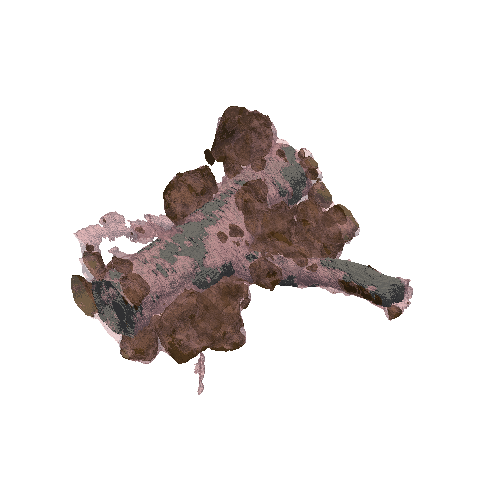

Calculating Distance Map For Image
D_euc processing time: 101.5 s
the breakdown of touching vs not touching
Not Touching Air    0.647044
Touching Air        0.352956
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_073_W1_S5_P.tif\
recon_073_W1_S5_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_073_W1_S5_P.tif\recon_073_W1_S5_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


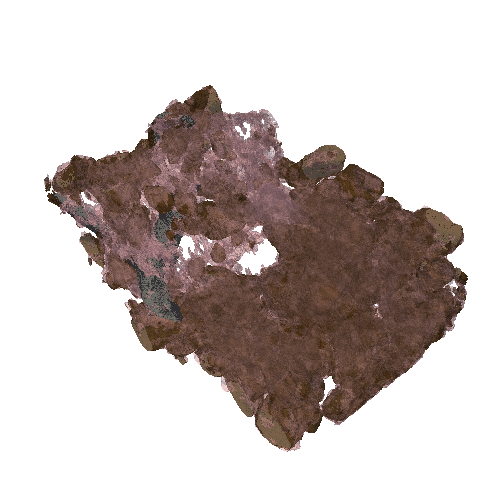

Calculating Distance Map For Image
D_euc processing time: 158.4 s
the breakdown of touching vs not touching
Touching Air        0.575842
Not Touching Air    0.424158
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_074_WT_S10_P.tif\
recon_074_WT_S10_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_074_WT_S10_P.tif\recon_074_WT_S10_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


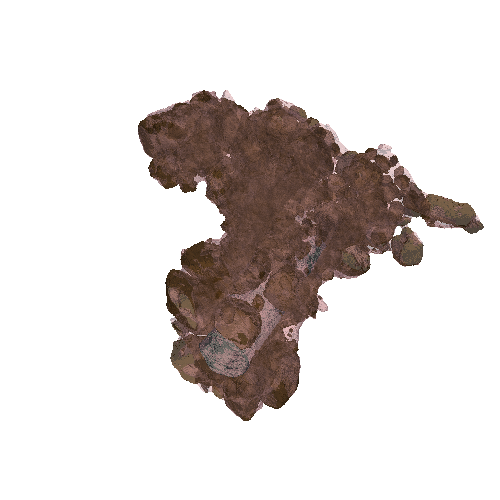

Calculating Distance Map For Image
D_euc processing time: 124.5 s
the breakdown of touching vs not touching
Not Touching Air    0.93698
Touching Air        0.06302
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_076_W16_S4_P.tif\
recon_076_W16_S4_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_076_W16_S4_P.tif\recon_076_W16_S4_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


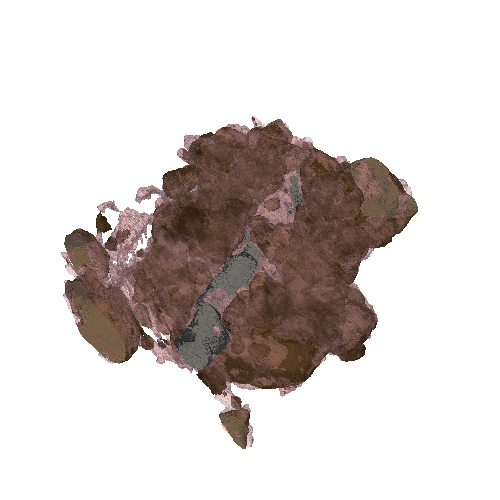

Calculating Distance Map For Image
D_euc processing time: 46.1 s
the breakdown of touching vs not touching
Touching Air        0.698975
Not Touching Air    0.301025
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_077_W1_S4_P.tif\
recon_077_W1_S4_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_077_W1_S4_P.tif\recon_077_W1_S4_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


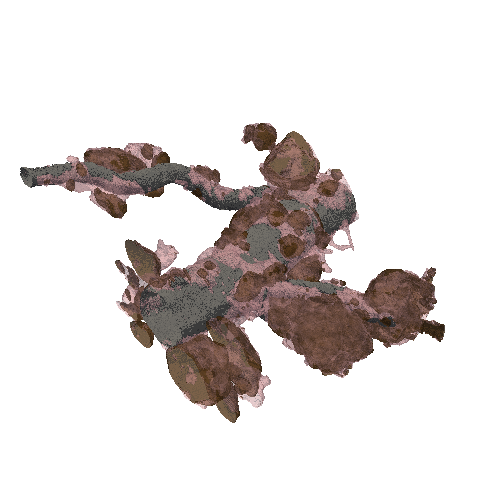

Calculating Distance Map For Image
D_euc processing time: 105.5 s
the breakdown of touching vs not touching
Touching Air        0.666269
Not Touching Air    0.333731
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_078_WT_S7_P.tif\
recon_078_WT_S7_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_078_WT_S7_P.tif\recon_078_WT_S7_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


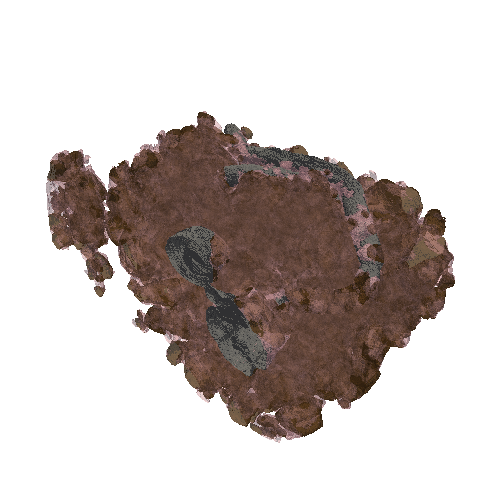

Calculating Distance Map For Image
D_euc processing time: 167.5 s
the breakdown of touching vs not touching
Not Touching Air    0.656277
Touching Air        0.343723
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_079_BALD_S1_P.tif\
recon_079_BALD_S1_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_079_BALD_S1_P.tif\recon_079_BALD_S1_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


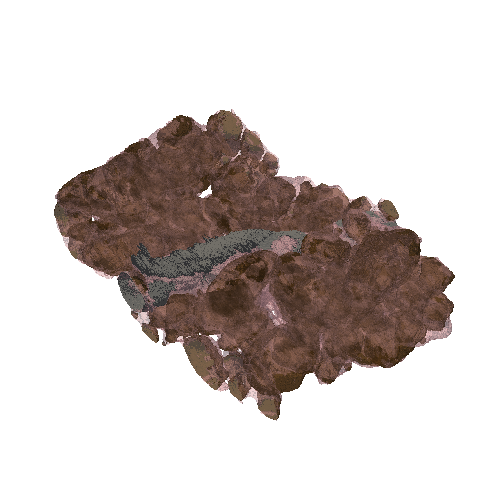

Calculating Distance Map For Image
D_euc processing time: 117.2 s
the breakdown of touching vs not touching
Not Touching Air    0.627632
Touching Air        0.372368
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_080_W16_S3_P.tif\
recon_080_W16_S3_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_080_W16_S3_P.tif\recon_080_W16_S3_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


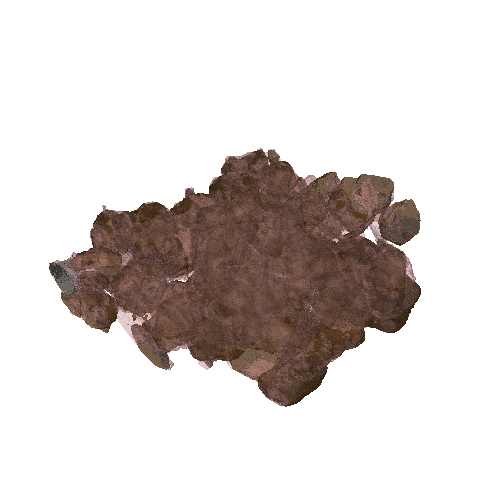

Calculating Distance Map For Image
D_euc processing time: 125.8 s
the breakdown of touching vs not touching
Not Touching Air    0.711189
Touching Air        0.288811
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_081_W1_S2_P.tif\
recon_081_W1_S2_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_081_W1_S2_P.tif\recon_081_W1_S2_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


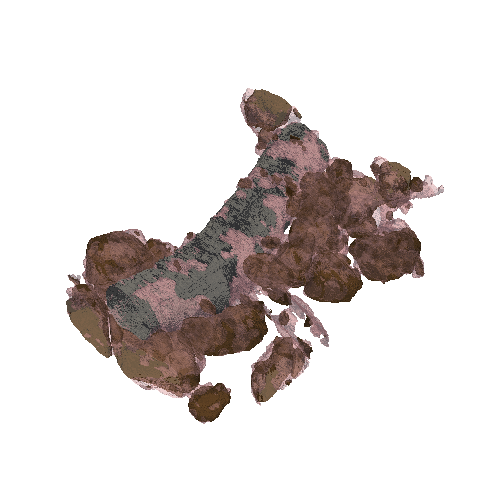

Calculating Distance Map For Image
D_euc processing time: 84.3 s
the breakdown of touching vs not touching
Not Touching Air    0.612059
Touching Air        0.387941
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_082_W1_S1_P.tif\
recon_082_W1_S1_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_082_W1_S1_P.tif\recon_082_W1_S1_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


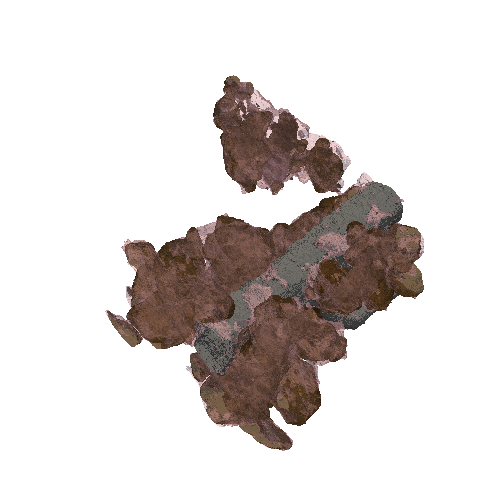

Calculating Distance Map For Image
D_euc processing time: 166.6 s
the breakdown of touching vs not touching
Touching Air        0.617831
Not Touching Air    0.382169
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_083_BALD_S4_P.tif\
recon_083_BALD_S4_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_083_BALD_S4_P.tif\recon_083_BALD_S4_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


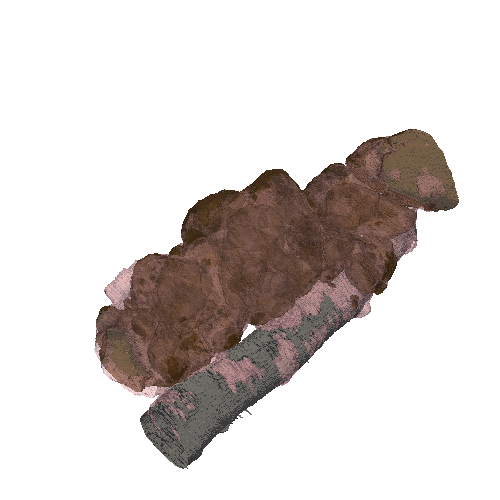

Calculating Distance Map For Image
D_euc processing time: 86.5 s
the breakdown of touching vs not touching
Touching Air        0.552624
Not Touching Air    0.447376
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_084_W16_S1_P.tif\
recon_084_W16_S1_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_084_W16_S1_P.tif\recon_084_W16_S1_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


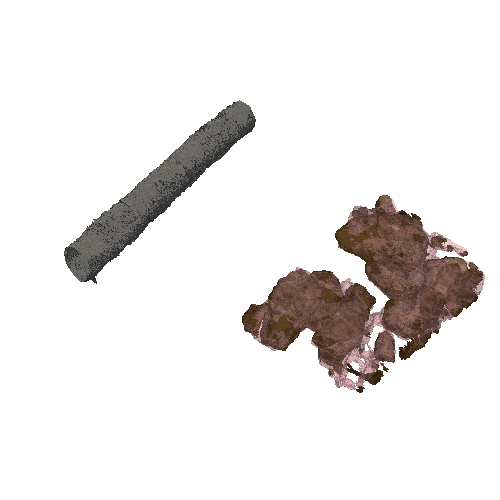

Calculating Distance Map For Image
D_euc processing time: 106.5 s
the breakdown of touching vs not touching
Touching Air        0.727893
Not Touching Air    0.272107
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_085_W1_S3_P.tif\
recon_085_W1_S3_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_085_W1_S3_P.tif\recon_085_W1_S3_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


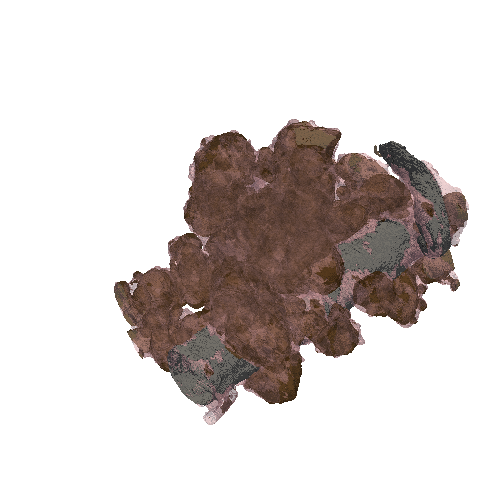

Calculating Distance Map For Image
D_euc processing time: 97.9 s
the breakdown of touching vs not touching
Not Touching Air    0.553482
Touching Air        0.446518
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_086_WT_S9_P.tif\
recon_086_WT_S9_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_086_WT_S9_P.tif\recon_086_WT_S9_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


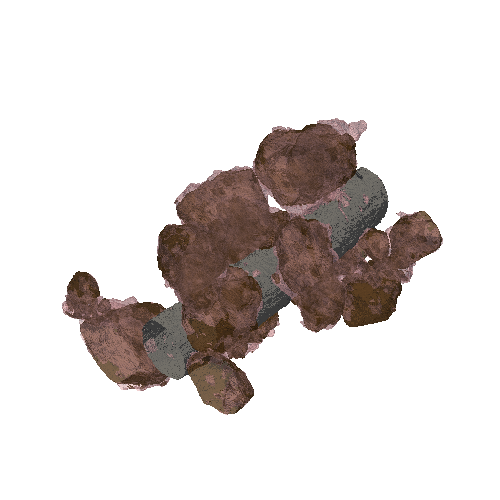

Calculating Distance Map For Image
D_euc processing time: 125.0 s
the breakdown of touching vs not touching
Touching Air        0.844208
Not Touching Air    0.155792
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_087_BALDY_S7_P.tif\
recon_087_BALDY_S7_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_087_BALDY_S7_P.tif\recon_087_BALDY_S7_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


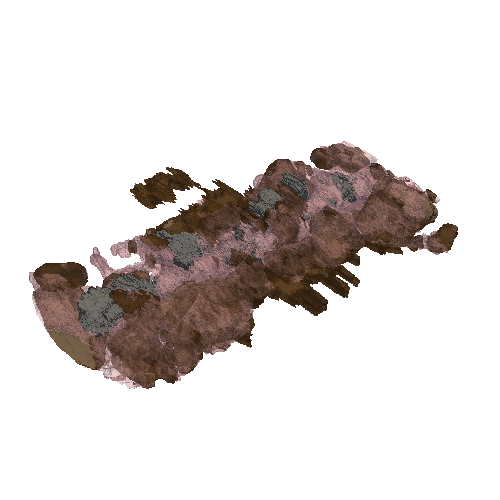

Calculating Distance Map For Image
D_euc processing time: 25.3 s
the breakdown of touching vs not touching
Not Touching Air    0.668443
Touching Air        0.331557
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_088_W16_S2_P.tif\
recon_088_W16_S2_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_088_W16_S2_P.tif\recon_088_W16_S2_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


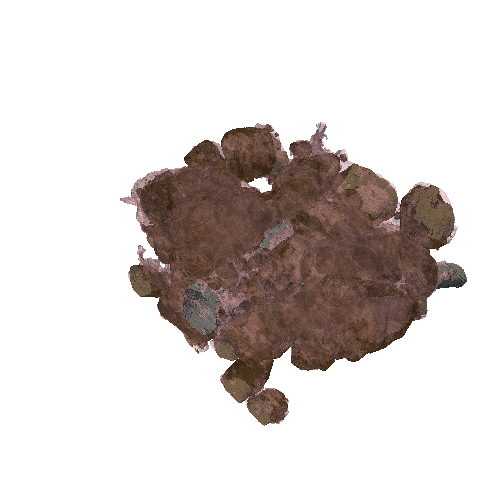

Calculating Distance Map For Image
D_euc processing time: 154.8 s
the breakdown of touching vs not touching
Not Touching Air    0.598394
Touching Air        0.401606
Name: touching, dtype: float64
E:\ANSTO_20960\rhizo_ai\segmented_out\recon_089_WT_S2_P.tif\
recon_089_WT_S2_P.tif


C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\ipykernel_launcher.py:104: UserWarning: E:\ANSTO_20960\rhizo_ai\python_out\recon_089_WT_S2_P.tif\recon_089_WT_S2_P.tif_rhizosheath_mask.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


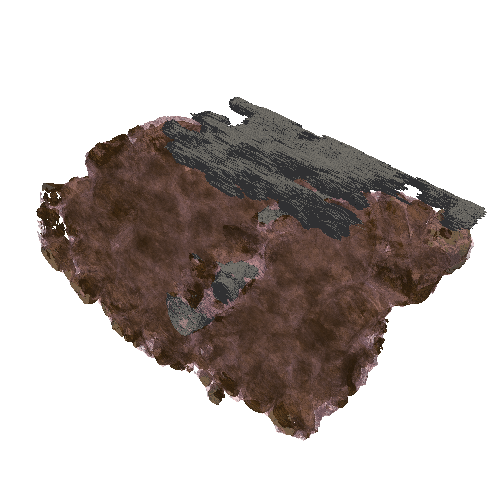

Calculating Distance Map For Image
D_euc processing time: 86.2 s
the breakdown of touching vs not touching
Touching Air        0.561592
Not Touching Air    0.438408
Name: touching, dtype: float64


In [14]:
for folder_x in post_ai_folder_paths:
    gc.collect()
    print (folder_x)
    IMAGE_ID = folder_x.replace(post_ai_folder_path_name, "")
    IMAGE_ID = IMAGE_ID.replace('\\', '')
    print (IMAGE_ID)
    output_directory = output_base+IMAGE_ID+"\\"
    if os.path.isdir(output_directory):
        out=(output_directory)
    else:
        os.mkdir(output_directory)
        out=output_directory
    os.chdir(out)   
    #Materials
    kapton_path="kapton\\"
    root_path="root\\"
    primary_path="primary\\"
    pore_path="pore\\" 
    mixed_path="mixed\\" 
    #
    path=folder_x
    ##################################
    ext="*.png"
    

#    #############################################################
    primary = []
    for filename in sorted(glob(path+primary_path+ext), key=os.path.getmtime):
        slice_n=skimage.io.imread(filename)
        primary.append(slice_n)
    primary = np.array(primary, dtype='ubyte')
    primary=primary[300:1700]
    primary_sml=zoom(primary, (scale_factor,scale_factor, scale_factor), order=0)
    del primary 
    gc.collect()
    
    mixed = []
    for filename in sorted(glob(path+mixed_path+ext), key=os.path.getmtime):
        slice_n=skimage.io.imread(filename)
        mixed.append(slice_n)
    mixed = np.array(mixed, dtype='ubyte')
    mixed=mixed[300:1700]
    mixed_sml=zoom(mixed, (scale_factor,scale_factor, scale_factor), order=0)
   
    del mixed 
    gc.collect()
    
    pore = []
    for filename in sorted(glob(path+pore_path+ext), key=os.path.getmtime):
        slice_n=skimage.io.imread(filename)
        pore.append(slice_n)
    pore = np.array(pore, dtype='ubyte')
    pore=pore[300:1700]
    pore_sml=zoom(pore, (scale_factor,scale_factor, scale_factor), order=0)
    
    del pore 
    gc.collect()
    
    root = []
    for filename in sorted(glob(path+root_path+ext), key=os.path.getmtime):
        slice_n=skimage.io.imread(filename)
        slice_n=scipy.ndimage.binary_dilation(slice_n)
        #slice_n=scipy.ndimage.binary_dilation(slice_n)
        slice_n=scipy.ndimage.binary_fill_holes(slice_n)
        #slice_n=scipy.ndimage.binary_erosion(slice_n)
        slice_n=scipy.ndimage.binary_erosion(slice_n)
        #slice_n=scipy.ndimage.binary_fill_holes(slice_n)
        root.append(slice_n)
    root = np.array(root, dtype='ubyte')
    root=root[300:1700]
    root_sml=zoom(root, (scale_factor,scale_factor, scale_factor), order=0)
    root_sml=getLargestCC(root_sml) #not a good idea because unconnected roots could exist
    del root 
    gc.collect()
 ###############################################################
    
    #Nothing can be in root
    pore_sml_root_crop= (pore_sml.astype(bool) * invert(root_sml.astype(bool))).astype(int) 

    #wrangle metrics
    from scipy import ndimage
    everything=root_sml+mixed_sml+primary_sml
    everything = (everything != 0).astype(int)
    
    everything_df = []
    
    for slice_n in range(everything.shape[0]): #this is crashing the kernel
        single_patch = everything[slice_n]
        rhizo_temp=ndimage.binary_fill_holes(single_patch)
        everything_df.append(rhizo_temp)
        
    everything_df = np.array(everything_df)
    
    del everything
    gc.collect()
    
    everything_binary = (everything_df!= 0).astype(int)
    del everything_df
    gc.collect()
    #everything_binary=ndimage.binary_fill_holes(everything_binary).astype(int) #this should be slice by slice
    rhizosheath_mask=getLargestCC(everything_binary)
    del everything_binary
    gc.collect()
    skimage.io.imsave(out+IMAGE_ID+"_rhizosheath_mask.tif", (rhizosheath_mask))
    #skimage.io.imsave(out+IMAGE_ID+"_everything_binary.tif", (everything_binary))

    #Put everything in mask
    #root_sml = rhizosheath_mask * root_sml
    mixed_sml = rhizosheath_mask * mixed_sml
    primary_sml= rhizosheath_mask * primary_sml
    #pore_sml= rhizosheath_mask * primary_sml
    
    primary_VOL = Volume(primary_sml, spacing=((Z),(Y),(X)))
    primary_ISO = primary_VOL.isosurface(1)
    primary_ISO.write(out+IMAGE_ID+"__primary.stl")
    
    mixed_VOL = Volume(mixed_sml, spacing=((Z),(Y),(X)))
    mixed_ISO = mixed_VOL.isosurface(1)
    mixed_ISO.write(out+IMAGE_ID+"__mixed.stl")
    
    root_VOL = Volume(root_sml, spacing=((Z),(Y),(X)))
    root_ISO = root_VOL.isosurface(1)
    root_ISO.write(out+IMAGE_ID+"__root.stl")
    
    rhizosheath_mask_VOL = Volume(rhizosheath_mask, spacing=((Z),(Y),(X)))
    rhizosheath_mask_ISO = rhizosheath_mask_VOL.isosurface(1)
    rhizosheath_mask_ISO.write(out+IMAGE_ID+"__rhizosheath_mask.stl")
    
    gc.collect()
    
    
    #plastic_STL=pv.read(out+IMAGE_ID+"__plastic.stl")
    root_STL=pv.read(out+IMAGE_ID+"__root.stl")
    primary_STL=pv.read(out+IMAGE_ID+"__primary.stl")
    mixed_STL=pv.read(out+IMAGE_ID+"__mixed.stl")
    rhizosheath_mask_STL=pv.read(out+IMAGE_ID+"__rhizosheath_mask.stl")
    
    root_STL_decimated = root_STL.decimate(0.9)
    root_STL_smooth = root_STL_decimated.smooth(n_iter=20)
    root_STL_smooth.save(out+IMAGE_ID+'root_STL_decimated.stl')
    
    primary_STL_decimated = primary_STL.decimate(0.9)
    primary_STL_smooth = primary_STL_decimated.smooth(n_iter=20)
    primary_STL_smooth.save(out+IMAGE_ID+'primary_STL_decimated.stl')
    
    mixed_STL_decimated = mixed_STL.decimate(0.9)
    mixed_STL_smooth = mixed_STL_decimated.smooth(n_iter=20)
    mixed_STL_smooth.save(out+IMAGE_ID+'mixed_STL_decimated.stl')
    
    pv.set_plot_theme("document")
    p = pv.Plotter()
    p.set_background("white")
    p.add_mesh(root_STL, color="grey")
    p.add_mesh(primary_STL, color="brown", opacity=0.8);
    p.add_mesh(mixed_STL, color="pink", opacity=0.5);
    #p.add_mesh(rhizosheath_mask_STL, color="black", opacity=0.2);
    p.window_size = 500, 500
    p.show(jupyter_backend='static');
    #p.screenshot(output_base+"images\\"+IMAGE_ID+'__3D_model.png') ;
    p.screenshot(out+IMAGE_ID+'__3D_model.png') ;
    
    #okay need a suite of quantative information 
    #Root Volume
    Root_INFO = skimage.measure.regionprops_table(root_sml.astype(int), properties = ('label','area'))
    Root_INFO=pd.DataFrame(Root_INFO)
    Root_INFO.columns = ['Label', 'Area_Pixels']
    Root_INFO['Root_Volume_Voxel_Resolved'] = Root_INFO['Area_Pixels'].astype(np.int64) * X *Y*Z
    Root_INFO.to_csv(out+IMAGE_ID+"_"+"Root_INFO.csv") 
    
    #Mixed Volume
    Mixed_INFO = skimage.measure.regionprops_table(mixed_sml.astype(int), properties = ('label','area'))
    Mixed_INFO=pd.DataFrame(Mixed_INFO)
    Mixed_INFO.columns = ['Label', 'Area_Pixels']
    Mixed_INFO['Mixed_Volume_Voxel_Resolved'] = Mixed_INFO['Area_Pixels'].astype(np.int64) * X *Y*Z
    Mixed_INFO.to_csv(out+IMAGE_ID+"_"+"Mixed_INFO.csv") 
    
    #Primary Volume
    Primary_INFO = skimage.measure.regionprops_table(primary_sml.astype(int), properties = ('label','area'))
    Primary_INFO=pd.DataFrame(Primary_INFO)
    Primary_INFO.columns = ['Label', 'Area_Pixels']
    Primary_INFO['Primary_Volume_Voxel_Resolved'] = Primary_INFO['Area_Pixels'].astype(np.int64) * X *Y*Z
    Primary_INFO.to_csv(out+IMAGE_ID+"_"+"Primary_INFO.csv") 
    
    #rizosheath Volume
    rhizosheath_INFO = skimage.measure.regionprops_table(rhizosheath_mask.astype(int), properties = ('label','area'))
    rhizosheath_INFO=pd.DataFrame(rhizosheath_INFO)
    rhizosheath_INFO.columns = ['Label', 'Area_Pixels']
    rhizosheath_INFO['rhizosheath_Volume_Voxel_Resolved'] = rhizosheath_INFO['Area_Pixels'].astype(np.int64) * X *Y*Z
    rhizosheath_INFO.to_csv(out+IMAGE_ID+"_"+"rhizosheath_INFO.csv") 
    
    root_erosion = Erosion3DimJ(root_sml)
    root__edge = root_sml ^ root_erosion
    ############################################################################################
    #Calculate the distance from the pores to the nearest root surface
    voxel_dims = [Z,Y,X] #um
    print("Calculating Distance Map For Image")
    t0 = time.time()
    D_euc_pore = np.ma.masked_array(distance_transform_edt(invert((pore_sml_root_crop != 0)), sampling=voxel_dims), 
                               dtype="float32")
    print('D_euc processing time:',str(np.round((time.time()-t0), 1)),'s')

    #Calculatethe distance from air at the edge of the root
    air_near_root_stack = D_euc_pore * root__edge.astype(float)
    air_near_root_stack = air_near_root_stack.astype(np.float32)
    data = np.array(air_near_root_stack)
    data=data.flatten()
    data=data[data != 0] #We drop 0's because that is observations not on the cell surface)
    min_distance= data.min()*5 # A little bit of a buffer because AI is not perfect 
    data =pd.DataFrame(data)
    data.columns = ['Distance']
    data["ID"]=IMAGE_ID
    data.to_csv(out+IMAGE_ID+"distance_root_to_air.csv")
    data['touching'] = np.where(data['Distance']<= min_distance, "Touching Air", "Not Touching Air") 
    print("the breakdown of touching vs not touching")
    print(data['touching'].value_counts(normalize=True))
    

    
    
   

In [15]:
#pore_sml_root_crop= (pore_sml.astype(bool) * invert(root_sml.astype(bool))).astype(int) 
#pore_sml_root_crop = (pore_sml_root_crop!= 0).astype(int)

In [1]:
#Create movie from base_path (search folders)
import os
from glob import glob
import moviepy.video.io.ImageSequenceClip

output_base = "E:\\ANSTO_20960\\rhizo_ai\\python_out\\"
fps=1

#image_files = [y for x in os.walk(output_base) for y in glob(os.path.join(x[0], '*.png'))]
image_files = [os.path.join(root, name)
             for root, dirs, files in os.walk(output_base)
             for name in files
             if name.endswith((".png"))]
image_files = [word for word in image_files if '3D_model' in word]
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(output_base+'render_movie.mp4')

Moviepy - Building video E:\ANSTO_20960\rhizo_ai\python_out\render_movie.mp4.
Moviepy - Writing video E:\ANSTO_20960\rhizo_ai\python_out\render_movie.mp4



Moviepy - Done !
Moviepy - video ready E:\ANSTO_20960\rhizo_ai\python_out\render_movie.mp4


In [15]:
image_files

['E:\\ANSTO_20960\\rhizo_ai\\python_out\\recon_072_W16_S5_P.tif\\recon_072_W16_S5_P.tif__3D_model.png',
 'E:\\ANSTO_20960\\rhizo_ai\\python_out\\recon_073_W1_S5_P.tif\\recon_073_W1_S5_P.tif__3D_model.png',
 'E:\\ANSTO_20960\\rhizo_ai\\python_out\\recon_074_WT_S10_P.tif\\recon_074_WT_S10_P.tif__3D_model.png',
 'E:\\ANSTO_20960\\rhizo_ai\\python_out\\recon_076_W16_S4_P.tif\\recon_076_W16_S4_P.tif__3D_model.png',
 'E:\\ANSTO_20960\\rhizo_ai\\python_out\\recon_077_W1_S4_P.tif\\recon_077_W1_S4_P.tif__3D_model.png',
 'E:\\ANSTO_20960\\rhizo_ai\\python_out\\recon_078_WT_S7_P.tif\\recon_078_WT_S7_P.tif__3D_model.png',
 'E:\\ANSTO_20960\\rhizo_ai\\python_out\\recon_079_BALD_S1_P.tif\\recon_079_BALD_S1_P.tif__3D_model.png',
 'E:\\ANSTO_20960\\rhizo_ai\\python_out\\recon_080_W16_S3_P.tif\\recon_080_W16_S3_P.tif__3D_model.png',
 'E:\\ANSTO_20960\\rhizo_ai\\python_out\\recon_081_W1_S2_P.tif\\recon_081_W1_S2_P.tif__3D_model.png',
 'E:\\ANSTO_20960\\rhizo_ai\\python_out\\recon_082_W1_S1_P.tif\\recon_

In [17]:
# #Create movie from base_path (search folders)
# import os
# from glob import glob
# import moviepy.video.io.ImageSequenceClip

# output_base = "G:\\SOIL_UCT\\OUT_PORE\\"
# fps=1

# image_files = [y for x in os.walk(output_base) for y in glob(os.path.join(x[0], '*.png'))]
# image_files = [word for word in image_files if 'DISTANCE' in word]
# clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
# clip.write_videofile(output_base+'DISTANCE.mp4')

In [18]:
# #Create movie from base_path (search folders)
# import os
# from glob import glob
# import moviepy.video.io.ImageSequenceClip

# output_base = "G:\\SOIL_UCT\\OUT_PORE\\"
# fps=1

# image_files = [y for x in os.walk(output_base) for y in glob(os.path.join(x[0], '*.png'))]
# image_files = [word for word in image_files if 'touching' in word]
# clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
# clip.write_videofile(output_base+'touching.mp4')